In [105]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [98]:
pca_df = pd.read_csv(r"C:\Users\44798\OneDrive\Documents\LSE YEAR 1\DS105\environmentalkuznets\Indicators_csv_cleaning_final_df\final_dataframe.csv")

In [101]:
#take a look at the dataframe

pca_df.head()


,Unnamed: 0,Country Code,"GNI per capita, Atlas method (current US$)","Labor force, female (% of total labor force)","Life expectancy at birth, total (years)",Population growth (annual %),"Population, total",Poverty headcount ratio at national poverty line (% of population),"Public spending on education, total (% of GDP)",Rural population (% of total population),...,2010 Total:,2011 Total:,2012 Total:,2013 Total:,2014 Total:,2015 Total:,2016 Total:,2017 Total:,2018 Total:,2019 Total:
0,0,AFG,510,21.741485654167413,64.486,2.384309,37171922,..,3.19979000091553,74.505,...,68.96605,66.94454,68.25744,72.18289,68.05715,67.20320,64.00314,61.77561,70.25405,62.48616
1,1,AGO,1900,49.60658575105186,60.782,3.276145,30809787,32.3,2.04470133781433,34.486,...,24.19840,24.67357,24.00830,24.53186,24.11941,25.03078,26.08120,25.44195,25.85236,27.16477
2,2,ALB,4860,42.720264348661246,78.458,-0.246732,2866376,23,..,39.681,...,21.94870,22.99650,21.70175,19.77038,19.13142,18.98271,18.14981,19.00622,19.75808,16.27997
3,3,AND,..,..,..,0.014285,77008,..,3.2467200756073,11.938,...,11.42903,11.66004,10.79727,10.14877,9.34741,9.94171,9.06227,9.30733,9.21394,8.52423
4,4,ARE,41470,16.933394884621272,77.814,1.503938,9630966,..,..,13.478,...,43.70844,43.53498,43.93421,42.88311,41.33546,43.92792,42.88604,43.32676,43.09622,41.74950


In [102]:
#cleaning the dataframe
pca_df.drop(['Unnamed: 0','Poverty headcount ratio at national poverty line (% of population)','Public spending on education, total (% of GDP)','Rural population (% of total population)','School enrollment, primary (% net)'],axis=1,inplace=True)
pca_df.drop([3,7,51,58,68,90,104,109,128,135,138,152,155,162,181],axis=0,inplace=True)


In [103]:
#Dataframe ready for PCA
pca_df.head()

,Country Code,"GNI per capita, Atlas method (current US$)","Labor force, female (% of total labor force)","Life expectancy at birth, total (years)",Population growth (annual %),"Population, total",Urban population (% of total population),2010 Total:,2011 Total:,2012 Total:,2013 Total:,2014 Total:,2015 Total:,2016 Total:,2017 Total:,2018 Total:,2019 Total:
0,AFG,510,21.741485654167413,64.486,2.384309,37171922,25.495,68.96605,66.94454,68.25744,72.18289,68.05715,67.20320,64.00314,61.77561,70.25405,62.48616
1,AGO,1900,49.60658575105186,60.782,3.276145,30809787,65.514,24.19840,24.67357,24.00830,24.53186,24.11941,25.03078,26.08120,25.44195,25.85236,27.16477
2,ALB,4860,42.720264348661246,78.458,-0.246732,2866376,60.319,21.94870,22.99650,21.70175,19.77038,19.13142,18.98271,18.14981,19.00622,19.75808,16.27997
4,ARE,41470,16.933394884621272,77.814,1.503938,9630966,86.522,43.70844,43.53498,43.93421,42.88311,41.33546,43.92792,42.88604,43.32676,43.09622,41.74950
5,ARG,12430,42.982509556851674,76.52,1.015808,44494502,91.870,13.13748,13.22056,12.94834,14.01846,13.56491,14.18288,13.93109,13.23692,12.60073,12.04087


In [106]:
pca_df.shape

(178, 17)

In [109]:
#Isolate for 2010 data only - then we will iterate over time
pca_df.drop(['2011 Total:','2012 Total:','2013 Total:','2014 Total:','2015 Total:','2016 Total:','2017 Total:','2018 Total:','2019 Total:'],axis=1,inplace=True)

In [111]:
from sklearn.preprocessing import StandardScaler
features = ['GNI per capita, Atlas method (current US$)','Labor force, female (% of total labor force)','Life expectancy at birth, total (years)','Population growth (annual %)','Population, total','Urban population (% of total population)']

#seperating out the features
x = pca_df.loc[:,features].values

y = pca_df.loc[:,['2010 Total:']].values

#standardize the features
x = StandardScaler().fit_transform(x)




ValueError: could not convert string to float: '..'

In [94]:
from sklearn.decomposition import _pca

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents , columns = ['Principal component 1','Principal component 2'])

In [57]:
#concatenating dataframe along axis=1, final_pca_df is the final DataFrame before plotting the data
final_pca_df = pd.concat([pca_df[['Country Code']], principalDf, pca_df[['Total Average PM2.5']]], axis = 1)

In [58]:
final_pca_df

,Country Code,Principal component 1,Principal component 2,Total Average PM2.5
0,AFG,-2.033258,1.625708,83.69929
1,AGO,-1.649166,-0.210398,29.17626
2,ALB,0.800181,-0.622078,19.30985
3,ARE,1.856114,2.349832,31.70214
4,ARG,1.190290,0.107831,23.43336
...,...,...,...,...
168,VUT,-1.554529,-0.325015,11.30322
169,YEM,-1.627961,2.911399,41.02875
170,ZAF,-0.652015,-0.264324,22.51121
171,ZMB,-1.843689,-0.429972,19.23287


In [88]:
final_pca_df.shape

(173, 4)

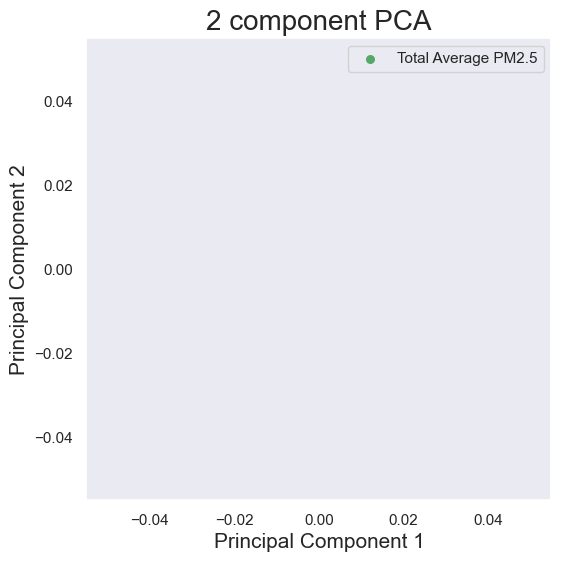

In [95]:
#PCA data visualization using matplotlib

fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)

targets = ['Total Average PM2.5']
colors = ['g']

for target, color in zip(targets,colors):
    indicesToKeep = final_pca_df['Total Average PM2.5'] == target
    ax.scatter(final_pca_df.loc[indicesToKeep,'Principal component 1'], final_pca_df.loc[indicesToKeep, 'Principal component 2'], c = color, s = 30)

ax.legend(targets)

ax.grid()


In [60]:
#determine explained variance using explained_variance_ratio attribute
pca.explained_variance_ratio_

array([0.41306375, 0.19544691])

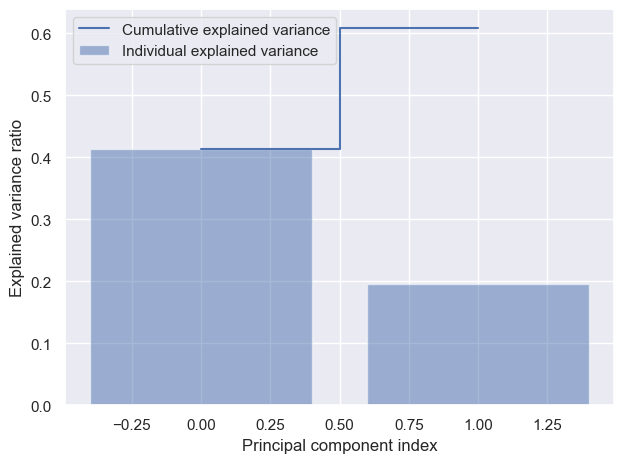

In [67]:
#Cumulative sum of eigenvalues; this will be used to create step plot for visualising the variance explained by each principal component
exp_var_pca = pca.explained_variance_ratio_
cumulative_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cumulative_sum_eigenvalues)), cumulative_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()